In [1]:
import cv2
import matplotlib.pyplot as plt  # 시각화 도구
import numpy as np
from PIL import Image
import tqdm
import matplotlib.pyplot as plt

import os
import glob

In [16]:
workspace='D:/Codes/testing/Development-of-histologic-and-pathological-photographic-intellectualization-analysis-system/test'
dataset=os.path.join(workspace,'dataset')
sample_image=os.path.join(dataset,'Image_bad_good')
sample_num='0552'
#good_image=glob.glob(os.path.join(sample_image,sample_num,'good')+'/*.jpg')
#bad_image=glob.glob(os.path.join(sample_image,sample_num,'bad')+'/*.jpg')
#target=os.path.join(dataset,'Image_labeling/'+filename+'_labeling')
good_image=glob.glob(os.path.join(workspace,'trash','good')+'/*.jpg')
bad_image=glob.glob(os.path.join(workspace,'trash','bad')+'/*.jpg')

In [17]:
print(test_good_image)
print(len(test_bad_image))

['D:/Codes/testing/Development-of-histologic-and-pathological-photographic-intellectualization-analysis-system/test\\trash\\good\\00207.jpg', 'D:/Codes/testing/Development-of-histologic-and-pathological-photographic-intellectualization-analysis-system/test\\trash\\good\\00212.jpg', 'D:/Codes/testing/Development-of-histologic-and-pathological-photographic-intellectualization-analysis-system/test\\trash\\good\\00268.jpg', 'D:/Codes/testing/Development-of-histologic-and-pathological-photographic-intellectualization-analysis-system/test\\trash\\good\\00269.jpg', 'D:/Codes/testing/Development-of-histologic-and-pathological-photographic-intellectualization-analysis-system/test\\trash\\good\\00302.jpg', 'D:/Codes/testing/Development-of-histologic-and-pathological-photographic-intellectualization-analysis-system/test\\trash\\good\\00307.jpg', 'D:/Codes/testing/Development-of-histologic-and-pathological-photographic-intellectualization-analysis-system/test\\trash\\good\\00311.jpg', 'D:/Codes/te

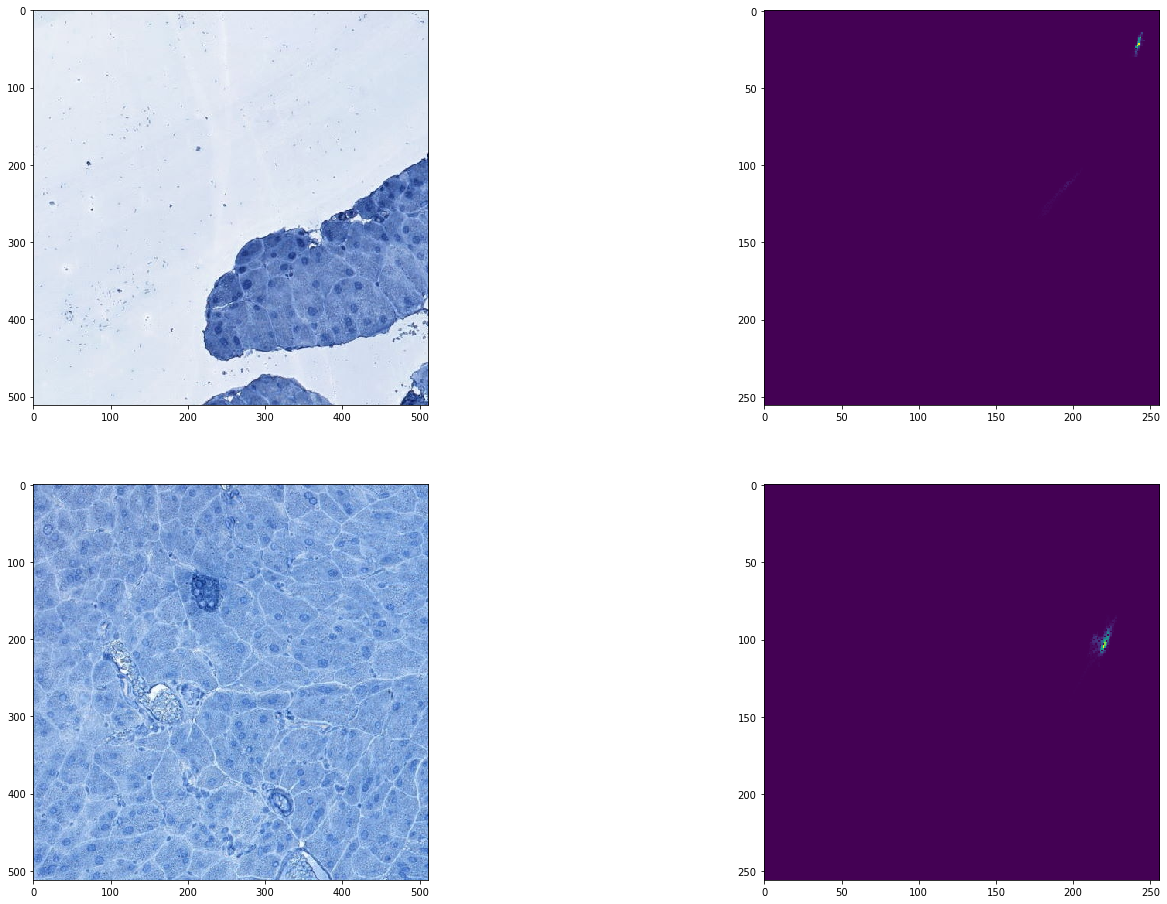

In [18]:
##testing
good_hsv=[]
bad_hsv=[]
good_thing=[]
bad_thing=[]
for i in good_image:
    roi = cv2.imread(i)
    good_thing.append(roi)
    imgBlur = cv2.medianBlur(roi, 55)   
    imgBlur2 = cv2.cvtColor(imgBlur, cv2.COLOR_BGR2RGB)
    good_hsv.append(cv2.cvtColor(imgBlur2,cv2.COLOR_BGR2HSV))   

for i in bad_image:
    roi = cv2.imread(i)
    bad_thing.append(roi)
    imgBlur = cv2.medianBlur(roi, 55)   
    imgBlur2 = cv2.cvtColor(imgBlur, cv2.COLOR_BGR2RGB)
    bad_hsv.append(cv2.cvtColor(imgBlur2,cv2.COLOR_BGR2HSV))

hist_ys_xv1 = cv2.calcHist( bad_hsv, [1,2], None, [256, 256], [0, 256, 0, 256] )
hist_ys_xv2 = cv2.calcHist( good_hsv, [1,2], None, [256, 256], [0, 256, 0, 256] )

plt.figure(figsize=(24,16))
plt.subplot(221)
plt.imshow(bad_thing[0],interpolation='nearest')   # x축 : V, y축 : S
plt.subplot(222)
plt.imshow(hist_ys_xv1,interpolation='nearest')   # x축 : V, y축 : S
plt.subplot(223)
plt.imshow(good_thing[0],interpolation='nearest')   # x축 : V, y축 : S
plt.subplot(224)
plt.imshow(hist_ys_xv2,interpolation='nearest')   # x축 : V, y축 : S
plt.show()

In [19]:
hist_ys_xv1.sum()

262144.0

In [20]:
good_thing[0].shape[0] * good_thing[0].shape[1]

262144

In [21]:
type(hist_ys_xv1)

numpy.ndarray

In [22]:
min_x,max_y=500,0
for i in range(256):
    for j in range(256):
       if hist_ys_xv1[i,j]>100:
            if min_x>j:
                min_x=j
            if max_y<i:
                max_y=i
print(min_x,max_y)

176 135


In [23]:
kernel=np.ones_like(hist_ys_xv1)
kernel[:max_y,min_x:]=0

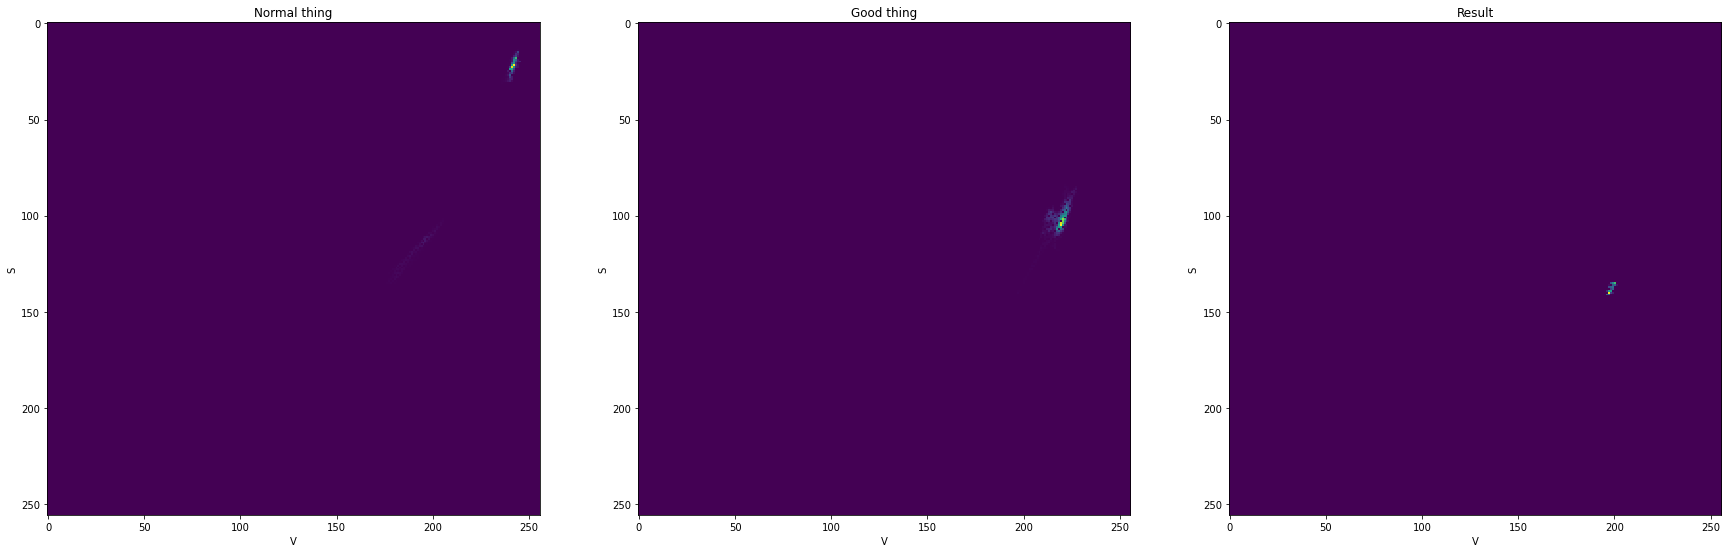

In [24]:
beta_hist=hist_ys_xv2*kernel
plt.figure(figsize=(30,22))
plt.subplot(131)
plt.imshow(hist_ys_xv1,interpolation='nearest')   # x축 : V, y축 : S
plt.xlabel('V')
plt.ylabel('S')
plt.title('Normal thing')

plt.subplot(132)
plt.imshow(hist_ys_xv2,interpolation='nearest')   # x축 : V, y축 : S
plt.xlabel('V')
plt.ylabel('S')
plt.title('Good thing')

plt.subplot(133)
plt.imshow(beta_hist,interpolation='nearest')   # x축 : V, y축 : S
plt.xlabel('V')
plt.ylabel('S')
plt.title('Result')

plt.show()

In [25]:
min_x,max_x=300,0
min_y,max_y=300,0
for i in range(256):
    for j in range(256):
       if beta_hist[i,j]>0:
            if min_x>j:
                min_x=j
            if max_x<j:
                max_x=j
            if min_y>i:
                min_y=i
            if max_y<i:
                max_y=i
print('S : ',min_y,' ~ ',max_y)  
print('V : ',min_x,' ~ ',max_x)  

S :  135  ~  141
V :  196  ~  201


In [21]:
def auto_histogram_range(g,b):
    good_hsv=[]
    bad_hsv=[]
    good_thing=[]
    bad_thing=[]
    for i in g:
        roi = cv2.imread(i)
        good_thing.append(roi)
        imgBlur = cv2.medianBlur(roi, 55)   
        imgBlur2 = cv2.cvtColor(imgBlur, cv2.COLOR_BGR2RGB)
        good_hsv.append(cv2.cvtColor(imgBlur2,cv2.COLOR_BGR2HSV))   

    for i in b:
        roi = cv2.imread(i)
        bad_thing.append(roi)
        imgBlur = cv2.medianBlur(roi, 55)   
        imgBlur2 = cv2.cvtColor(imgBlur, cv2.COLOR_BGR2RGB)
        bad_hsv.append(cv2.cvtColor(imgBlur2,cv2.COLOR_BGR2HSV))

    hist_ys_xv1 = cv2.calcHist( bad_hsv, [1,2], None, [256, 256], [0, 256, 0, 256] )
    hist_ys_xv2 = cv2.calcHist( good_hsv, [1,2], None, [256, 256], [0, 256, 0, 256] )
    
    min_x,max_y=500,0
    for i in range(256):
        for j in range(256):
            if hist_ys_xv1[i,j]>100:
                if min_x>j:
                    min_x=j
                if max_y<i:
                    max_y=i
    
    kernel=np.ones_like(hist_ys_xv1)
    kernel[:max_y,min_x:]=0
    
    beta_hist=hist_ys_xv2*kernel
    
    min_x,max_x=300,0
    min_y,max_y=300,0
    for i in range(256):
        for j in range(256):
            if beta_hist[i,j]>0:
                    if min_x>j:
                        min_x=j
                    if max_x<j:
                        max_x=j
                    if min_y>i:
                        min_y=i
                    if max_y<i:
                        max_y=i
    print('S : ',min_y,' ~ ',max_y)  
    print('V : ',min_x,' ~ ',max_x)

In [28]:
workspace='D:/Codes/testing/Development-of-histologic-and-pathological-photographic-intellectualization-analysis-system/test'
dataset=os.path.join(workspace,'dataset')
sample_image_path=os.path.join(dataset,'Image_bad_good')
sample_num=['0552','0556','1624','2415','3904','3934','4116','5155','5303','5901']

for i in sample_num:
    print(f'{i} 이미지')
    good_image=glob.glob(os.path.join(sample_image_path,i,'good')+'/*.jpg')
    bad_image=glob.glob(os.path.join(sample_image_path,i,'bad')+'/*.jpg')
    auto_histogram_range(good_image,bad_image)

0552 이미지
S :  140  ~  186
V :  155  ~  202
0556 이미지
S :  148  ~  194
V :  161  ~  198
1624 이미지
S :  114  ~  204
V :  143  ~  223
2415 이미지
S :  62  ~  192
V :  126  ~  221
3904 이미지
S :  129  ~  201
V :  150  ~  211
3934 이미지
S :  79  ~  185
V :  153  ~  207
4116 이미지
S :  83  ~  217
V :  100  ~  209
5155 이미지
S :  79  ~  212
V :  97  ~  216
5303 이미지
S :  135  ~  159
V :  186  ~  208
5901 이미지
S :  71  ~  221
V :  90  ~  215
